In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.107 Seconds
Building M ...
	Done. Took 0.094 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 0.393 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): -8.149*(-0.176)^t + 7.888*(0.087)^t + -7.559*(0.423)^t + -4.510*(0.223)^t + 12.330843 * delta(t,0)
		RMSE = 0.360
		Matlab: [-8.15 -0.18  7.89  0.09 -7.56  0.42 -4.51  0.22]
	Done. Took 1.815 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): 8.694*(-0.161)^t + -8.975*(-0.260)^t + 8.940*(-0.153)^t + 0.923*(0.464)^t + -9.581903 * delta(t,0)
		RMSE = 0.029
		Matlab: [ 8.69 -0.16 -8.97 -0.26  8.94 -0.15  0.92  0.46]
	Done. Took 13.687 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1): -3.133*(0.003)^t + 3.312*(-0.013)^t + 0.715*(-0.009)^t + -0.218*(0.050)^t + -0.676596 * delta(t,0)
		RMSE = 0.000
		Matlab: [-3

{0: {1: array([-8.15, -0.18,  7.89,  0.09, -7.56,  0.42, -4.51,  0.22]),
  2: array([ 8.69, -0.16, -8.97, -0.26,  8.94, -0.15,  0.92,  0.46])},
 1: {0: array([-3.13,  0.  ,  3.31, -0.01,  0.72, -0.01, -0.22,  0.05]),
  2: array([ 0.82, -0.  ,  1.75,  0.  , -0.06, -0.01, -0.86,  0.  ])},
 2: {0: array([-0.01, -0.02, -0.08, -0.59, -1.04,  0.41,  0.83,  0.5 ]),
  1: array([ 4.37,  0.96,  2.59,  0.53, -7.96,  0.72, -0.05,  0.01])}}

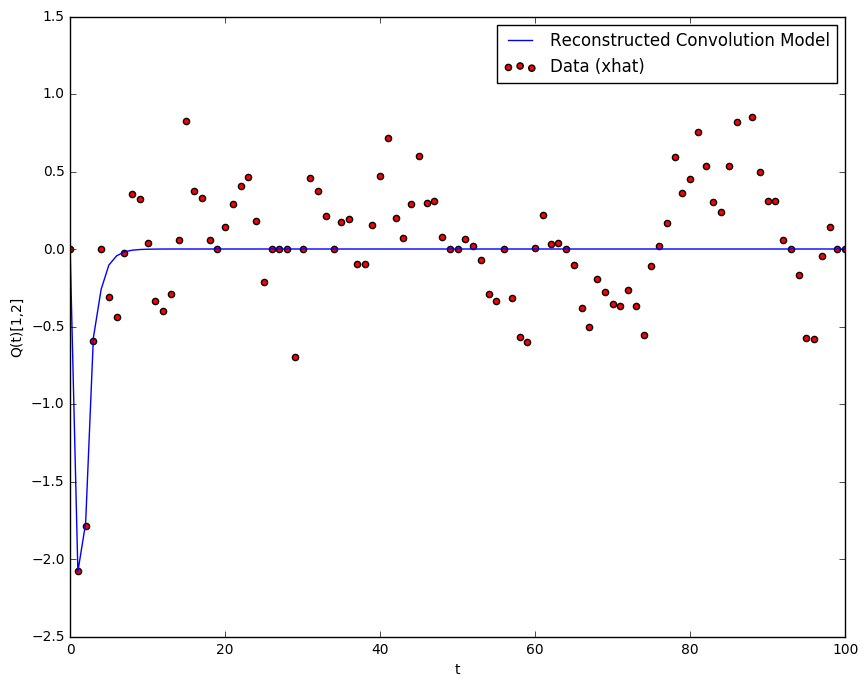

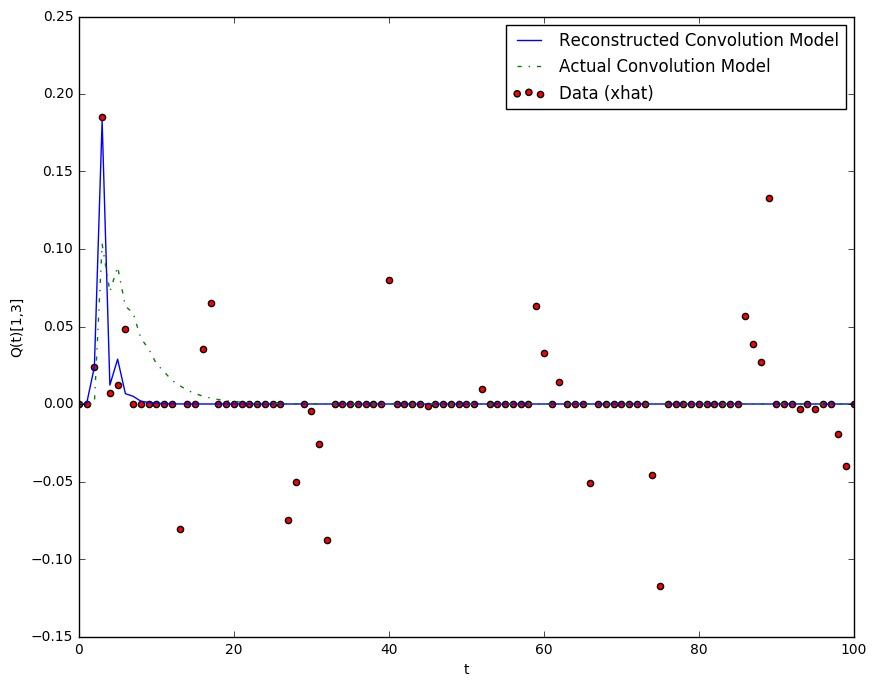

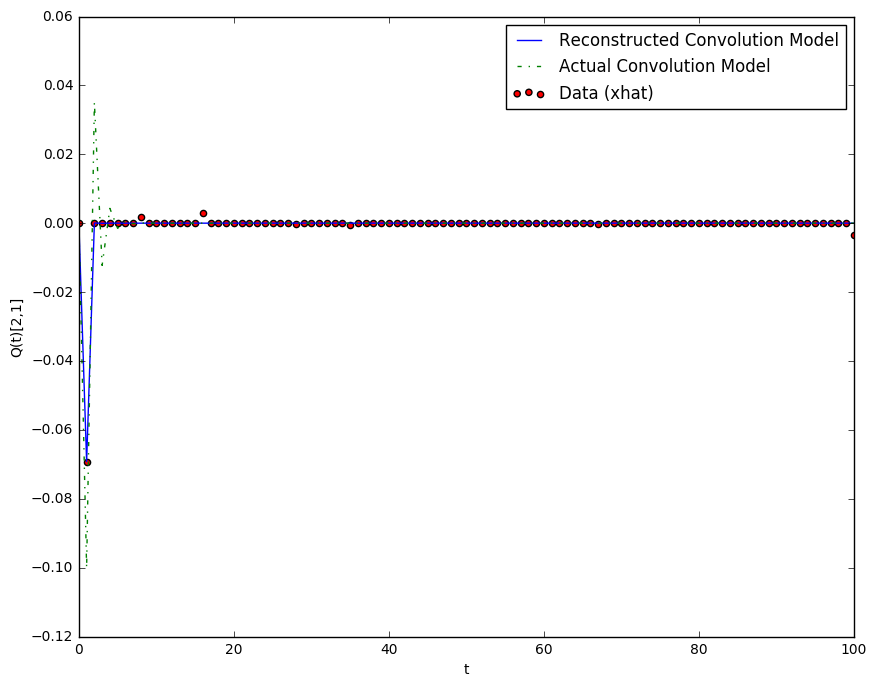

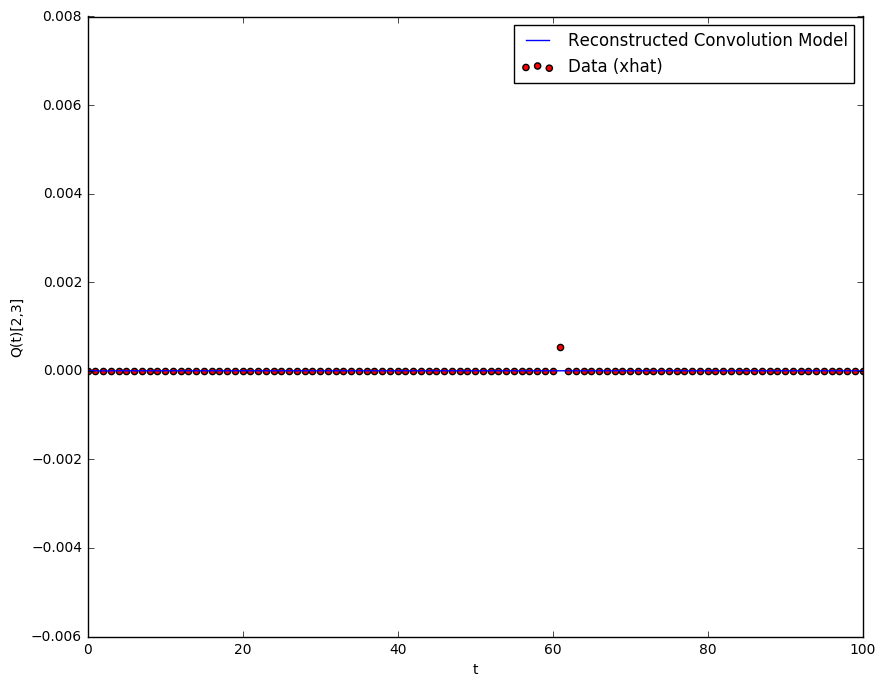

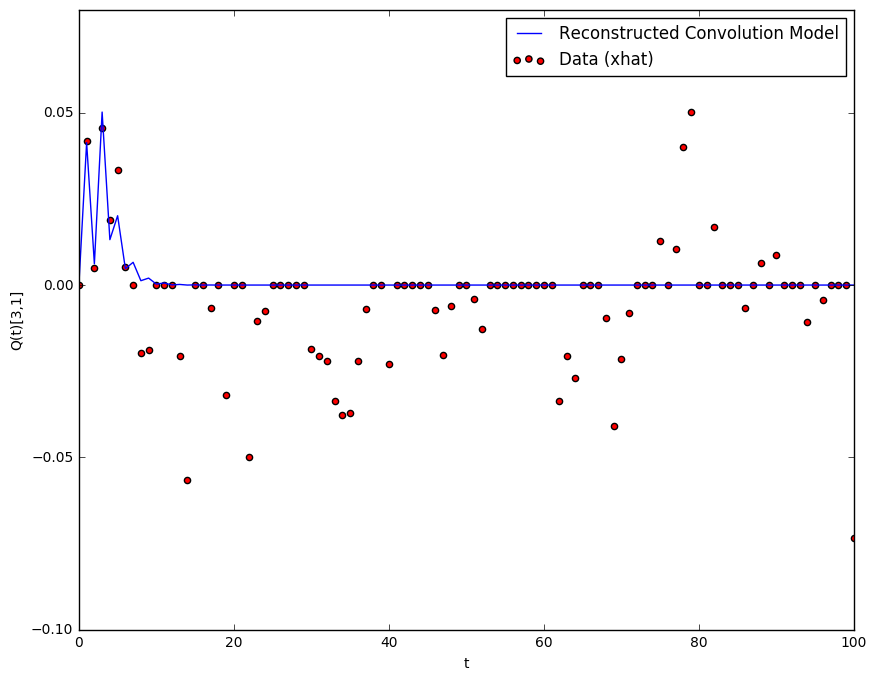

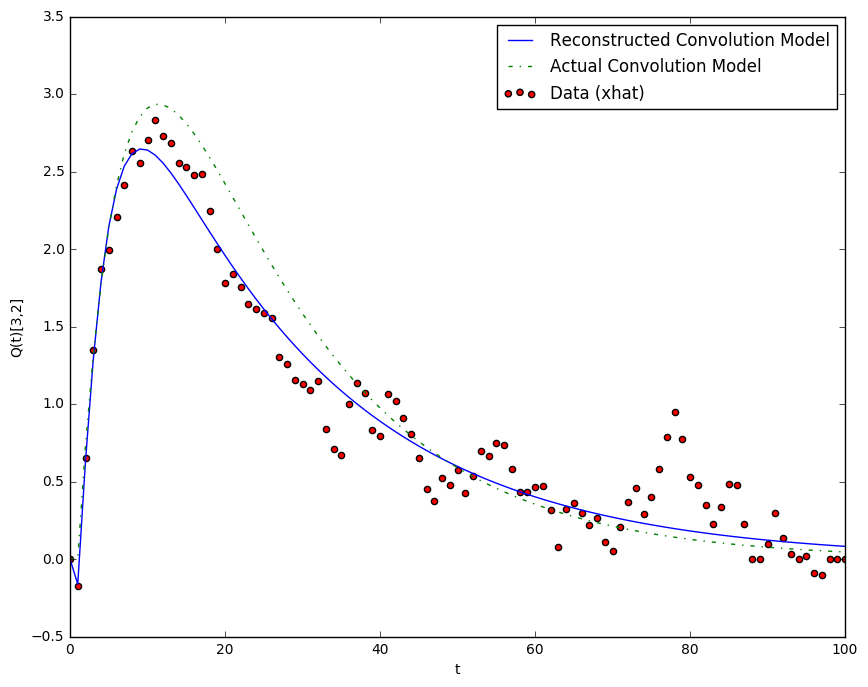

In [2]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=1000, bounds=10, order=4, real_params=real_params, robust=True)
recon.unmeasured(y,plot=True)  #, ij=(1,3))